1. This code block opens a csv file from yahoo finance and converts that data into a matrix. The data being used is ethereum opening and closing prices.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from ast import Num
from ast import Num

filename = "ETH-USD (4).csv"
fields = []
rows = []

with open(filename,'r') as csvfile:
  csvreader = csv.reader(csvfile)
  fields = next(csvreader)
  for row in csvreader:
    rows.append(row)

raw_data = np.matrix(np.array(rows))

X = raw_data[:,1:].astype(np.float)

delta = X[:,4] 





2. This code block uses the matrix from the previous code block to run a least-squares error fitting model. The specific model being used assigns a weight to the last 30 days of prices to determine the next day's price.

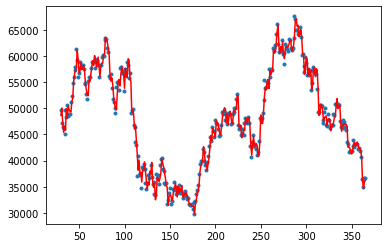

In [ ]:


A = np.zeros((336,30))
bmarker = 0
cr = 0
cc = 0
while cr < 336:
  v = bmarker 
  while cc < 30:
    A[cr][cc] = delta[v,0]
    v+=1
    cc+=1
  cc=0
  bmarker+=1
  cr+=1

y = delta[30:]
x = np.arange(30,366,1)

sol = np.linalg.lstsq(A,y, rcond=None)

beta = sol[0]
f = A@beta
t = range(30,366)
plt.plot(t,y,'.')
plt.plot(t,f,'r')









3. This code block uses the model generated in the second code block to make a prediction of tomorrow's prices.

In [ ]:
td = delta[336:366,0]


td = td.reshape(30,)
beta = beta.reshape(30,)

nxt = 0
for i in range(0,30):
  nxt+= beta[0,i]*td[0,i]

flux = nxt- td[0,29]

pct = flux/td[0,29]



print("yesterday closing: ", td[0,29])
print("projexted closing price: ", nxt)
print("projected change since yesterday closing: ", flux)
print("projected percent change: ", pct)











yesterday closing:  36577.988281
projexted closing price:  36374.540408002904
projected change since yesterday closing:  -203.44787299709424
projected percent change:  -0.005562030132279659


4. The final code block predicts the coin prices over the next year. The model is much more accurate in the short term while making a general trend in the long term.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

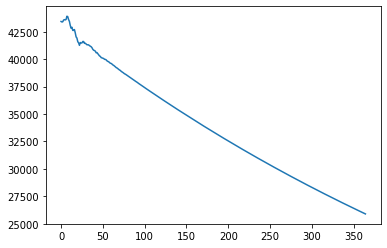

In [ ]:

c = 0
n = 0
proj =[]
while c < 365:
  for i in range(0,30):
    n+= beta[0,i]*td[0,i]
  for i in range(0, 29):
    td[0,i] = td[0,i+1]
  td[0,29] = n
  proj.append(n)
  c+=1
  n=0

t=range(0,365)

plt.plot(t,proj)


    

